<h1>1. Supervised, Semi-Supervised, and Unsupervised Learning</h1>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import statistics
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
import random
import warnings
warnings.filterwarnings("ignore")

<h2>(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29. Download the data in
https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes.</h2>

In [2]:
names = ['id', 'diagnosis']
for i in range(3):
    names.append('radius' + "_" + str(i))
    names.append('texture' + "_" + str(i))
    names.append('perimeter' + "_" + str(i))
    names.append('area' + "_" + str(i))
    names.append('smoothness' + "_" + str(i))
    names.append('compactness' + "_" + str(i))
    names.append('concavity' + "_" + str(i))
    names.append('concave points' + "_" + str(i))
    names.append('symmetry' + "_" + str(i))
    names.append('fractal dimension' + "_" + str(i))

In [3]:
df = pd.read_csv('../data/wdbc.data', sep=',', names=names, header=None)
df = df.iloc[:, 1:]
df

,diagnosis,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
diagnosisDict = {'M':0, 'B':1}
df['diagnosis'] = df['diagnosis'].replace(diagnosisDict)
df

,diagnosis,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [5]:
train_dfs = []
test_dfs = []

for M in range(30):
    df = shuffle(df)
    df_0 = df[df['diagnosis'] == 0]
    df_1 = df[df['diagnosis'] == 1]
    df_train = pd.concat([df_0.iloc[int(len(df_0)*.2):, :], df_1.iloc[int(len(df_1)*.2):, :]])
    df_test = pd.concat([df_0.iloc[:int(len(df_0)*.2), :], df_1.iloc[:int(len(df_1)*.2), :]])
    
    train_dfs.append(df_train)
    test_dfs.append(df_test)

<h2>(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning
M=30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the
average
scores (accuracy, precision,
recall,
F1-score, and AUC) that you obtain from each algorithm.</h2>

<h3>i. Supervised Learning:
Train an
L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F1-score, and AUC, for
both training and test sets over your
M
runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.</h3>

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

Run: 1
Train accuracy: 0.9802631578947368
Train precision: 0.9726962457337884
Train recall: 0.9965034965034965
Train F1 score: 0.9844559585492227
Train AUC: 0.9747223364870422
Test accuracy: 0.9734513274336283
Test precision: 0.9722222222222222
Test recall: 0.9859154929577465
Test F1 score: 0.979020979020979
Test AUC: 0.9691482226693494

Run: 2
Train accuracy: 0.9846491228070176
Train precision: 0.979381443298969
Train recall: 0.9965034965034965
Train F1 score: 0.9878682842287696
Train AUC: 0.9806046894282188
Test accuracy: 0.9734513274336283
Test precision: 0.9722222222222222
Test recall: 0.9859154929577465
Test F1 score: 0.979020979020979
Test AUC: 0.9691482226693494

Run: 3
Train accuracy: 0.9824561403508771
Train precision: 0.9793103448275862
Train recall: 0.993006993006993
Train F1 score: 0.986111111111111
Train AUC: 0.9788564376799671
Test accuracy: 0.9734513274336283
Test precision: 0.9722222222222222
Test recall: 0.9859154929577465
Test F1 score: 0.979020979020979
Test AUC: 0.9

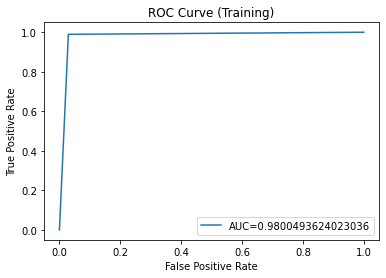

Test:
[[38  4]
 [ 1 70]]


<Figure size 432x288 with 0 Axes>

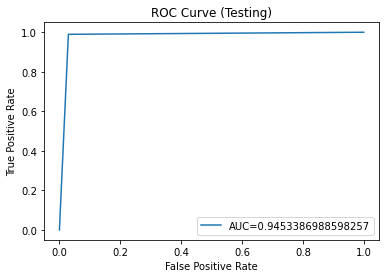


Run: 6
Train accuracy: 0.9758771929824561
Train precision: 0.9661016949152542
Train recall: 0.9965034965034965
Train F1 score: 0.9810671256454389
Train AUC: 0.9688399835458658
Test accuracy: 0.9734513274336283
Test precision: 0.9722222222222222
Test recall: 0.9859154929577465
Test F1 score: 0.979020979020979
Test AUC: 0.9691482226693494

Run: 7
Train accuracy: 0.9802631578947368
Train precision: 0.9726962457337884
Train recall: 0.9965034965034965
Train F1 score: 0.9844559585492227
Train AUC: 0.9747223364870422
Test accuracy: 0.9823008849557522
Test precision: 0.9859154929577465
Test recall: 0.9859154929577465
Test F1 score: 0.9859154929577465
Test AUC: 0.9810529845741113

Run: 8
Train accuracy: 0.9868421052631579
Train precision: 0.9794520547945206
Train recall: 1.0
Train F1 score: 0.9896193771626297
Train AUC: 0.9823529411764707
Test accuracy: 0.9646017699115044
Test precision: 0.9855072463768116
Test recall: 0.9577464788732394
Test F1 score: 0.9714285714285714
Test AUC: 0.9669684775

In [6]:
train_accuracy_supervised = []
train_precision_supervised = []
train_recall_supervised = []
train_f1_supervised = []
train_AUC_supervised = []

test_accuracy_supervised = []
test_precision_supervised = []
test_recall_supervised = []
test_f1_supervised = []
test_AUC_supervised = []


for M in range(30):
    print("Run:", M + 1)
    
    df_train = train_dfs[M]
    df_test = test_dfs[M]
    
    X_train = df_train.drop(['diagnosis'],axis=1)
    y_train = df_train[['diagnosis']]
    X_test = df_test.drop(['diagnosis'],axis=1)
    y_test = df_test[['diagnosis']]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)
    
    parameters = [{'C':[0.01, 0.1, 1, 10, 100], 'max_iter':[2000], 'loss':['squared_hinge']}]

    clf = LinearSVC(multi_class='ovr', penalty='l1', dual = False)
    grid = GridSearchCV(clf, parameters, cv = 5)
    grid.fit(X_train_scaled, y_train)
        
    # train
    y_pred_train = grid.predict(X_train_scaled)
    train_accuracy_supervised.append(accuracy_score(y_train, y_pred_train)) 
    print("Train accuracy:", accuracy_score(y_train, y_pred_train))
    train_precision_supervised.append(precision_score(y_train, y_pred_train))
    print("Train precision:", precision_score(y_train, y_pred_train))
    train_recall_supervised.append(recall_score(y_train, y_pred_train))
    print("Train recall:", recall_score(y_train, y_pred_train))
    train_f1_supervised.append(f1_score(y_train, y_pred_train))
    print("Train F1 score:", f1_score(y_train, y_pred_train))
    train_fpr, train_tpr, _ = roc_curve(y_train, y_pred_train)
    train_AUC_supervised.append(auc(train_fpr, train_tpr))
    print("Train AUC:", auc(train_fpr, train_tpr))
    
    # test
    y_pred_test = grid.predict(X_test_scaled)
    test_accuracy_supervised.append(accuracy_score(y_test, y_pred_test)) 
    print("Test accuracy:", accuracy_score(y_test, y_pred_test))
    test_precision_supervised.append(precision_score(y_test, y_pred_test))
    print("Test precision:", precision_score(y_test, y_pred_test))
    test_recall_supervised.append(recall_score(y_test, y_pred_test))
    print("Test recall:", recall_score(y_test, y_pred_test))
    test_f1_supervised.append(f1_score(y_test, y_pred_test))
    print("Test F1 score:", f1_score(y_test, y_pred_test))
    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_test)
    test_AUC_supervised.append(auc(test_fpr, test_tpr))
    print("Test AUC:", auc(test_fpr, test_tpr))
    
    if (M + 1) == 5:
        print("For run number 5:")
        print("Train:")
        print(confusion_matrix(y_train, y_pred_train))
        #create ROC curve
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(train_fpr, train_tpr)))
        plt.title('ROC Curve (Training)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
        
        print("Test:")
        print(confusion_matrix(y_test, y_pred_test))
        plt.figure()
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(test_fpr, test_tpr)))
        plt.title('ROC Curve (Testing)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    print()

In [9]:
print("Train:")
print("Avg accuracy score:", statistics.mean(train_accuracy_supervised))
print("Avg precision score:", statistics.mean(train_precision_supervised))
print("Avg recall score:", statistics.mean(train_recall_supervised))
print("Avg F1 score:", statistics.mean(train_f1_supervised))
print("Avg AUC score:", statistics.mean(train_AUC_supervised))
print()
print("Test:")
print("Avg accuracy score:", statistics.mean(test_accuracy_supervised))
print("Avg precision score:", statistics.mean(test_precision_supervised))
print("Avg recall score:", statistics.mean(test_recall_supervised))
print("Avg f1 score:", statistics.mean(test_f1_supervised))
print("Avg AUC score:", statistics.mean(test_AUC_supervised))

Train:
Avg accuracy score: 0.9842836257309941
Avg precision score: 0.9808334410464972
Avg recall score: 0.9944055944055944
Avg F1 score: 0.9875626544170811
Avg AUC score: 0.9808302481831893

Test:
Avg accuracy score: 0.9716814159292035
Avg precision score: 0.9716117316404921
Avg recall score: 0.9840375586854461
Avg f1 score: 0.9776313375277973
Avg AUC score: 0.9674156047395484


<h3>ii. Semi-Supervised Learning/ Self-training:
select 50% of the positive
class along with 50% of the negative class in the training set as
labeled data
and the rest as
unlabelled data. You can select them randomly.</h3>
<h4>A. Train an
L1-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.</h4>
<h4>B. Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data andthe
average accuracy, precision, recall,
F1-score, and AUC, for both training
and test sets over your
M
runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.</h4>

Run: 1
Train accuracy: 0.950207468879668
Train precision: 0.8666666666666667
Train recall: 0.9701492537313433
Train F1 score: 0.915492957746479
Train AUC: 0.9563389946817635
Test accuracy: 0.9823008849557522
Test precision: 0.9859154929577465
Test recall: 0.9859154929577465
Test F1 score: 0.9859154929577465
Test AUC: 0.9810529845741113

Run: 2
Train accuracy: 0.970954356846473
Train precision: 0.9066666666666666
Train recall: 1.0
Train F1 score: 0.9510489510489509
Train AUC: 0.9797687861271676
Test accuracy: 0.9823008849557522
Test precision: 0.9726027397260274
Test recall: 1.0
Test F1 score: 0.9861111111111112
Test AUC: 0.9761904761904762

Run: 3
Train accuracy: 0.9336099585062241
Train precision: 0.9315068493150684
Train recall: 0.8607594936708861
Train F1 score: 0.8947368421052632
Train AUC: 0.9149476480700109
Test accuracy: 0.9646017699115044
Test precision: 0.9855072463768116
Test recall: 0.9577464788732394
Test F1 score: 0.9714285714285714
Test AUC: 0.9669684775318579

Run: 4
Tra

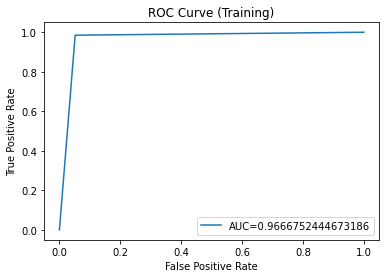

Test:
[[40  2]
 [ 0 71]]


<Figure size 432x288 with 0 Axes>

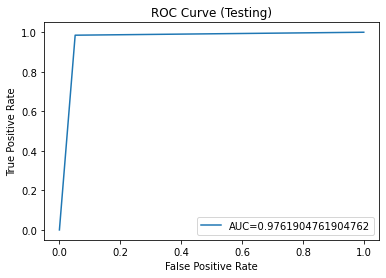


Run: 6
Train accuracy: 0.975103734439834
Train precision: 0.96
Train recall: 0.96
Train F1 score: 0.96
Train AUC: 0.9709638554216867
Test accuracy: 0.9823008849557522
Test precision: 0.9859154929577465
Test recall: 0.9859154929577465
Test F1 score: 0.9859154929577465
Test AUC: 0.9810529845741113

Run: 7
Train accuracy: 0.983402489626556
Train precision: 0.9577464788732394
Train recall: 0.9855072463768116
Train F1 score: 0.9714285714285714
Train AUC: 0.9840326929558476
Test accuracy: 0.9734513274336283
Test precision: 1.0
Test recall: 0.9577464788732394
Test F1 score: 0.9784172661870503
Test AUC: 0.9788732394366197

Run: 8
Train accuracy: 0.9626556016597511
Train precision: 0.9452054794520548
Train recall: 0.9324324324324325
Train F1 score: 0.9387755102040816
Train AUC: 0.9542401683120246
Test accuracy: 0.9646017699115044
Test precision: 0.9855072463768116
Test recall: 0.9577464788732394
Test F1 score: 0.9714285714285714
Test AUC: 0.9669684775318579

Run: 9
Train accuracy: 0.9585062240

In [10]:
train_accuracy_semi_supervised = []
train_precision_semi_supervised = []
train_recall_semi_supervised = []
train_f1_semi_supervised = []
train_AUC_semi_supervised = []

test_accuracy_semi_supervised = []
test_precision_semi_supervised = []
test_recall_semi_supervised = []
test_f1_semi_supervised = []
test_AUC_semi_supervised = []
for M in range(30):
    print("Run:", M + 1)
    
    df_train = train_dfs[M]
    df_test = test_dfs[M]
    
    scaler = MinMaxScaler()
    df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train.iloc[:, 1:]), columns=df_train.columns.values[1:])
    df_test_scaled = pd.DataFrame(scaler.transform(df_test.iloc[:, 1:]), columns=df_test.columns.values[1:])
    
    df_train_scaled['diagnosis'] = [int(i) for i in df_train.iloc[:, 0]]
    df_test_scaled['diagnosis'] = [int(i) for i in df_test.iloc[:, 0]]
    
    df_0_train = df_train_scaled[df_train_scaled['diagnosis'] == 0]
    df_1_train = df_test_scaled[df_test_scaled['diagnosis'] == 1]
    
    # first 50% = unlabeled, last 50% = labeled
    df_train_unlab = pd.concat([df_0_train.iloc[:int(len(df_0_train)*.5), :], df_1_train.iloc[:int(len(df_1_train)*.5), :]])
    df_train_lab = pd.concat([df_0_train.iloc[int(len(df_0_train)*.5):, :], df_1_train.iloc[int(len(df_1_train)*.5):, :]])
    
    X_train_unlab = df_train_unlab.drop(['diagnosis'],axis=1).reset_index(drop=True)
#     y_train_unlab = df_train[['diagnosis']]
    X_train_lab = df_train_lab.drop(['diagnosis'],axis=1).reset_index(drop=True)
    y_train_lab = df_train_lab[['diagnosis']]
    X_test = df_test_scaled.drop(['diagnosis'],axis=1).reset_index(drop=True)
    y_test = df_test_scaled[['diagnosis']]
        
    parameters = [{'C':[0.01, 0.1, 1, 10, 100], 'max_iter':[2000], 'loss':['squared_hinge']}]
    clf = GridSearchCV(LinearSVC(penalty = 'l1', dual = False), parameters, cv = 5)
    clf.fit(X_train_lab, y_train_lab)
    
    distances = np.abs(clf.decision_function(X_train_unlab))
    
    while len(distances) > 0:
        max_dist_index = np.where(distances == max(distances))[0][0]
        prediction = clf.predict(X_train_unlab.loc[[max_dist_index]])
        X_train_lab = pd.concat([X_train_lab, X_train_unlab.loc[[max_dist_index]]]).reset_index(drop=True)
        y_train_lab = pd.DataFrame(np.append(y_train_lab, prediction))
#         y_train_unlab = y_train_unlab.drop(index = d).reset_index(drop=True)
        X_train_unlab = X_train_unlab.drop(index = max_dist_index).reset_index(drop=True)
    
        clf.fit(X_train_lab, y_train_lab)
        
        distances = np.delete(distances, max_dist_index)
    
    X_train = X_train_lab
    y_train = y_train_lab
    
    parameters = [{'C':[0.01, 0.1, 1, 10, 100], 'max_iter':[2000], 'loss':['squared_hinge']}]

    clf.fit(X_train, y_train)
    
    # train
    y_pred_train = grid.predict(X_train)
    train_accuracy_semi_supervised.append(accuracy_score(y_train, y_pred_train)) 
    print("Train accuracy:", accuracy_score(y_train, y_pred_train))
    train_precision_semi_supervised.append(precision_score(y_train, y_pred_train))
    print("Train precision:", precision_score(y_train, y_pred_train))
    train_recall_semi_supervised.append(recall_score(y_train, y_pred_train))
    print("Train recall:", recall_score(y_train, y_pred_train))
    train_f1_semi_supervised.append(f1_score(y_train, y_pred_train))
    print("Train F1 score:", f1_score(y_train, y_pred_train))
    train_fpr, train_tpr, _ = roc_curve(y_train, y_pred_train)
    train_AUC_semi_supervised.append(auc(train_fpr, train_tpr))
    print("Train AUC:", auc(train_fpr, train_tpr))
    
    # test
    y_pred_test = grid.predict(X_test)
    test_accuracy_semi_supervised.append(accuracy_score(y_test, y_pred_test)) 
    print("Test accuracy:", accuracy_score(y_test, y_pred_test))
    test_precision_semi_supervised.append(precision_score(y_test, y_pred_test))
    print("Test precision:", precision_score(y_test, y_pred_test))
    test_recall_semi_supervised.append(recall_score(y_test, y_pred_test))
    print("Test recall:", recall_score(y_test, y_pred_test))
    test_f1_semi_supervised.append(f1_score(y_test, y_pred_test))
    print("Test F1 score:", f1_score(y_test, y_pred_test))
    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_test)
    test_AUC_semi_supervised.append(auc(test_fpr, test_tpr))
    print("Test AUC:", auc(test_fpr, test_tpr))
    
    if (M + 1) == 5:
        print("For run number 5:")
        print("Train:")
        print(confusion_matrix(y_train, y_pred_train))
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(train_fpr, train_tpr)))
        plt.title('ROC Curve (Training)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
        
        print("Test:")
        print(confusion_matrix(y_test, y_pred_test))
        plt.figure()
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(test_fpr, test_tpr)))
        plt.title('ROC Curve (Testing)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    print()
    

In [11]:
print("Train:")
print("Avg accuracy score:", statistics.mean(train_accuracy_semi_supervised))
print("Avg precision score:", statistics.mean(train_precision_semi_supervised))
print("Avg recall score:", statistics.mean(train_recall_semi_supervised))
print("Avg F1 score:", statistics.mean(train_f1_semi_supervised))
print("Avg AUC score:", statistics.mean(train_AUC_semi_supervised))
print()
print("Test:")
print("Avg accuracy score:", statistics.mean(test_accuracy_semi_supervised))
print("Avg precision score:", statistics.mean(test_precision_semi_supervised))
print("Avg recall score:", statistics.mean(test_recall_semi_supervised))
print("Avg f1 score:", statistics.mean(test_f1_semi_supervised))
print("Avg AUC score:", statistics.mean(test_AUC_semi_supervised))

Train:
Avg accuracy score: 0.9614107883817428
Avg precision score: 0.9282199282352427
Avg recall score: 0.9435828549361975
Avg F1 score: 0.934347298264276
Avg AUC score: 0.9564073160903913

Test:
Avg accuracy score: 0.9628318584070796
Avg precision score: 0.9890700156131104
Avg recall score: 0.9516431924882629
Avg f1 score: 0.96913771441502
Avg AUC score: 0.9666946121171474


<h3>iii. Unsupervised Learning:
Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume
k=2.</h3>

<h4>A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?</h4>

In order to lower the chances of getting trapped in a local minimum, you can run KMeans multiple times (high number of iterations), as well as initialize the KMeans algorithm using init='k-means++'. This is a biased random sampling method that prefers centroids that are far from each other, rather than selecting them randomly (if you had used init='random'), which may result in the initial centroids being positioned right next to one another. When using init='k-means++', there is a higher likelihood of finding the global optimum in a fewer number of iterations.

<h4>B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall,
F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.</h4>
<h4>C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall,
F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the
test data.
</h4>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/neighbors.html

Run: 1
Cluster centers: [[0.25107925 0.35297326 0.24283372 0.14087042 0.36460013 0.18001891
  0.10080278 0.13021088 0.3411253  0.25844503 0.06435563 0.19205535
  0.05958504 0.02747852 0.18448687 0.1618029  0.05600962 0.18015295
  0.17217313 0.08170024 0.20090328 0.31992035 0.18800137 0.09684653
  0.3633373  0.14401262 0.12603713 0.25951231 0.22532761 0.15270632]
 [0.50312201 0.47813252 0.50403685 0.36339586 0.46723198 0.41962745
  0.41427152 0.46400672 0.46108538 0.30317962 0.19452781 0.18942246
  0.18066477 0.13270189 0.18396096 0.33110812 0.1283425  0.31179231
  0.19141647 0.137329   0.47627723 0.44076705 0.46111966 0.31196071
  0.49482198 0.35817293 0.3861933  0.65165642 0.33303451 0.26149618]]
Train accuracy: 0.9276315789473685
Train precision: 0.9230769230769231
Train recall: 0.965034965034965
Train F1 score: 0.9435897435897437
Train AUC: 0.9148704236939532
Test accuracy: 0.911504424778761
Test precision: 0.8961038961038961
Test recall: 0.971830985915493
Test F1 score: 0.932432432

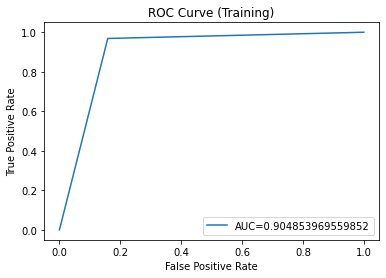

Test:
[[37  5]
 [ 2 69]]


<Figure size 432x288 with 0 Axes>

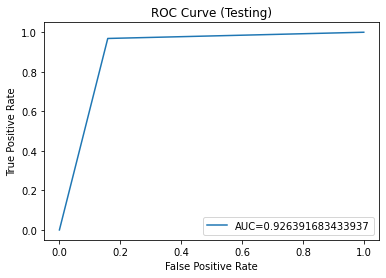


Run: 6
Cluster centers: [[0.26034779 0.28485783 0.25187537 0.14713781 0.29421818 0.18010753
  0.10384163 0.13137477 0.33427223 0.25069607 0.06456756 0.1875871
  0.06068474 0.02869111 0.17807981 0.13534654 0.05939525 0.18312888
  0.16991443 0.0821606  0.21003727 0.33852226 0.19700609 0.10225063
  0.36373556 0.15057394 0.13279761 0.26453384 0.22201627 0.1512515 ]
 [0.51918192 0.39950102 0.52016616 0.37697696 0.41924028 0.43117454
  0.42832305 0.48106691 0.45637835 0.2974888  0.2000883  0.18907323
  0.18682744 0.13801114 0.18134399 0.26605205 0.12789116 0.31243375
  0.18845844 0.13475892 0.49369907 0.47957084 0.47777075 0.32542764
  0.50735368 0.36734088 0.3923365  0.66357161 0.3292721  0.25671743]]
Train accuracy: 0.9276315789473685
Train precision: 0.9147540983606557
Train recall: 0.9755244755244755
Train F1 score: 0.9441624365482233
Train AUC: 0.9112916495269435
Test accuracy: 0.9292035398230089
Test precision: 0.8987341772151899
Test recall: 1.0
Test F1 score: 0.9466666666666668
Test

Cluster centers: [[0.2538174  0.34664501 0.24543143 0.14290827 0.35769767 0.17912971
  0.10239598 0.12960034 0.30509737 0.25903012 0.0625679  0.1842431
  0.05859014 0.02789431 0.18168211 0.13171107 0.07498582 0.24238211
  0.15263265 0.11589973 0.20420973 0.33684903 0.19175556 0.0989033
  0.35800717 0.14875579 0.13144299 0.26260356 0.22194638 0.15491414]
 [0.51490001 0.47833042 0.51611572 0.3741695  0.47347218 0.42985012
  0.42262137 0.47873352 0.42839028 0.29646832 0.19154088 0.18373493
  0.18029317 0.13439785 0.17812047 0.25613445 0.15702613 0.40497768
  0.16278722 0.17256113 0.49162594 0.47779933 0.47650203 0.32509779
  0.50396092 0.37245545 0.39513095 0.66794402 0.3369192  0.26213751]]
Train accuracy: 0.9298245614035088
Train precision: 0.9177631578947368
Train recall: 0.9755244755244755
Train F1 score: 0.9457627118644069
Train AUC: 0.9142328259975319
Test accuracy: 0.911504424778761
Test precision: 0.8961038961038961
Test recall: 0.971830985915493
Test F1 score: 0.9324324324324325


Cluster centers: [[0.47924098 0.40107304 0.48253087 0.34906711 0.47166639 0.4199247
  0.4128752  0.46305008 0.46261944 0.30765728 0.19346614 0.20025896
  0.18072597 0.13170535 0.18583504 0.26538975 0.12938831 0.31789549
  0.19962238 0.13902426 0.45762964 0.45802599 0.44474236 0.30092077
  0.51061265 0.36255499 0.38945417 0.65735586 0.33931226 0.2652694 ]
 [0.23389598 0.2938976  0.2292035  0.13681542 0.35868109 0.1822973
  0.10518379 0.13314177 0.34118129 0.25404271 0.06563662 0.18955857
  0.06104002 0.02870287 0.17984819 0.13316419 0.05870897 0.18315963
  0.17095822 0.08526779 0.18747597 0.3261014  0.17938761 0.09298471
  0.36698169 0.1494036  0.13270133 0.26678113 0.22719529 0.15444502]]
Train accuracy: 0.9166666666666666
Train precision: 0.9025974025974026
Train recall: 0.972027972027972
Train F1 score: 0.936026936026936
Train AUC: 0.897778691896339
Test accuracy: 0.9734513274336283
Test precision: 0.9722222222222222
Test recall: 0.9859154929577465
Test F1 score: 0.979020979020979
Te

Cluster centers: [[0.25642007 0.28471752 0.24783901 0.14466887 0.28438183 0.16852402
  0.10192623 0.13102103 0.33676565 0.25692001 0.06372258 0.18595105
  0.05835827 0.02854424 0.17990974 0.15746246 0.05651108 0.17743428
  0.16998337 0.08186012 0.20578746 0.3178969  0.19201778 0.09972865
  0.36991698 0.144523   0.1270459  0.27573955 0.22507774 0.15230268]
 [0.49226664 0.38385435 0.49324698 0.35189387 0.40488372 0.40915278
  0.41319388 0.45671132 0.45901049 0.30205812 0.19033088 0.18691779
  0.17830493 0.12985225 0.1838003  0.32915874 0.12992666 0.31393878
  0.19380496 0.13585994 0.46618267 0.43377969 0.45163229 0.30208691
  0.50615506 0.36038277 0.38774547 0.68435746 0.33499443 0.2603381 ]]
Train accuracy: 0.918859649122807
Train precision: 0.9163879598662207
Train recall: 0.958041958041958
Train F1 score: 0.9367521367521366
Train AUC: 0.9054915672562731
Test accuracy: 0.9203539823008849
Test precision: 0.9078947368421053
Test recall: 0.971830985915493
Test F1 score: 0.9387755102040817

In [26]:
train_accuracy_unsupervised = []
train_precision_unsupervised = []
train_recall_unsupervised = []
train_f1_unsupervised = []
train_AUC_unsupervised = []

test_accuracy_unsupervised = []
test_precision_unsupervised = []
test_recall_unsupervised = []
test_f1_unsupervised = []
test_AUC_unsupervised = []
for M in range(30):
    print("Run:", M + 1)
    
    df_train = train_dfs[M]
    df_test = test_dfs[M]

    X_train = df_train.drop(['diagnosis'],axis=1).reset_index(drop=True)
    y_train = df_train[['diagnosis']].reset_index(drop=True)
    X_test = df_test.drop(['diagnosis'],axis=1).reset_index(drop=True)
    y_test = df_test[['diagnosis']].reset_index(drop=True)
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

    kmeans = KMeans(n_clusters=2, init='k-means++', n_init=100)
    kmeans.fit(X_train_scaled)
    print("Cluster centers:", kmeans.cluster_centers_)

    neigh = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(X_train_scaled)
    neigh_distances, indices = neigh.kneighbors(kmeans.cluster_centers_)
#     print(indices)

    polls = []
    
    for cluster in range(2):
        cluster_points = indices[cluster]
        cluster_0_count = 0
        cluster_1_count = 0
        
        for point in cluster_points:
            if y_train.loc[point]['diagnosis'] == 0:
                cluster_0_count += 1
            else:
                cluster_1_count += 1
            
        
        if cluster_0_count < cluster_1_count:
            polls.append(1)
        else:
            polls.append(0)

    polls = []
    for cluster in range(2):
        kmeans_distances = kmeans.transform(X_train_scaled)[:, cluster]
        top_30_kmeans_distances = sorted(kmeans_distances)[:30]
        count = []
        for dist in top_30_kmeans_distances:
            dist_index = np.where(kmeans_distances == dist)[0][0]
            count.append(y_train.loc[dist_index]['diagnosis'])
        polls.append(max(set(count), key=count.count))
    
    # train
    y_pred_train = []
    for p in kmeans.predict(X_train_scaled):
        y_pred_train.append(polls[p])
    train_accuracy_unsupervised.append(accuracy_score(y_train, y_pred_train)) 
    print("Train accuracy:", accuracy_score(y_train, y_pred_train))
    train_precision_unsupervised.append(precision_score(y_train, y_pred_train))
    print("Train precision:", precision_score(y_train, y_pred_train))
    train_recall_unsupervised.append(recall_score(y_train, y_pred_train))
    print("Train recall:", recall_score(y_train, y_pred_train))
    train_f1_unsupervised.append(f1_score(y_train, y_pred_train))
    print("Train F1 score:", f1_score(y_train, y_pred_train))
    train_fpr, train_tpr, _ = roc_curve(y_train, y_pred_train)
    train_AUC_unsupervised.append(auc(train_fpr, train_tpr))
    print("Train AUC:", auc(train_fpr, train_tpr))
    
    # test
    y_pred_test = []
    for p in kmeans.predict(X_test_scaled):
        y_pred_test.append(polls[p])
    test_accuracy_unsupervised.append(accuracy_score(y_test, y_pred_test)) 
    print("Test accuracy:", accuracy_score(y_test, y_pred_test))
    test_precision_unsupervised.append(precision_score(y_test, y_pred_test))
    print("Test precision:", precision_score(y_test, y_pred_test))
    test_recall_unsupervised.append(recall_score(y_test, y_pred_test))
    print("Test recall:", recall_score(y_test, y_pred_test))
    test_f1_unsupervised.append(f1_score(y_test, y_pred_test))
    print("Test F1 score:", f1_score(y_test, y_pred_test))
    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_test)
    test_AUC_unsupervised.append(auc(test_fpr, test_tpr))
    print("Test AUC:", auc(test_fpr, test_tpr))
    
    if (M + 1) == 5:
        print("For run number 5:")
        print("Train:")
        print(confusion_matrix(y_train, y_pred_train))
        #create ROC curve
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(train_fpr, train_tpr)))
        plt.title('ROC Curve (Training)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
        
        print("Test:")
        print(confusion_matrix(y_test, y_pred_test))
        plt.figure()
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(test_fpr, test_tpr)))
        plt.title('ROC Curve (Testing)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    print()

In [27]:
print("Train:")
print("Avg accuracy score:", statistics.mean(train_accuracy_unsupervised))
print("Avg precision score:", statistics.mean(train_precision_unsupervised))
print("Avg recall score:", statistics.mean(train_recall_unsupervised))
print("Avg F1 score:", statistics.mean(train_f1_unsupervised))
print("Avg AUC score:", statistics.mean(train_AUC_unsupervised))
print()
print("Test:")
print("Avg accuracy score:", statistics.mean(test_accuracy_unsupervised))
print("Avg precision score:", statistics.mean(test_precision_unsupervised))
print("Avg recall score:", statistics.mean(test_recall_unsupervised))
print("Avg f1 score:", statistics.mean(test_f1_unsupervised))
print("Avg AUC score:", statistics.mean(test_AUC_unsupervised))

Train:
Avg accuracy score: 0.9255847953216374
Avg precision score: 0.9140260316580585
Avg recall score: 0.972960372960373
Avg F1 score: 0.9425350089233335
Avg AUC score: 0.9094213629507747

Test:
Avg accuracy score: 0.9238938053097345
Avg precision score: 0.9150358349098698
Avg recall score: 0.9699530516431925
Avg f1 score: 0.9414290654145253
Avg AUC score: 0.9079923988374693


<h3>iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters. Instead, use fit−predict method.</h3>

https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

Spectral clustering is used to identify groups of nodes in a graph based on their connecting edges. This approach allows spectral clustering to outperform many traditional clustering algorithms in most cases. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Run: 1
Train accuracy: 0.8618421052631579
Train precision: 0.8250728862973761
Train recall: 0.9895104895104895
Train F1 score: 0.8998410174880763
Train AUC: 0.8182846565199506
Test accuracy: 0.8672566371681416
Test precision: 0.8255813953488372
Test recall: 1.0
Test F1 score: 0.9044585987261146
Test AUC: 0.8214285714285714

Run: 2
Train accuracy: 0.8793859649122807
Train precision: 0.8427299703264095
Train recall: 0.993006993006993
Train F1 score: 0.9117174959871588
Train AUC: 0.84062114356232
Test accuracy: 0.8938053097345132
Test precision: 0.8641975308641975
Test recall: 0.9859154929577465
Test F1 score: 0.9210526315789475
Test AUC: 0.8620053655264923

Run: 3
Train accuracy: 0.8574561403508771
Train precision: 0.8202898550724638
Train recall: 0.9895104895104895
Train F1 score: 0.8969889064976228
Train AUC: 0.8124023035787741
Test accuracy: 0.8407079646017699
Test precision: 0.797752808988764
Test recall: 1.0
Test F1 score: 0.8875
Test AUC: 0.7857142857142857

Run: 4
Train accuracy: 

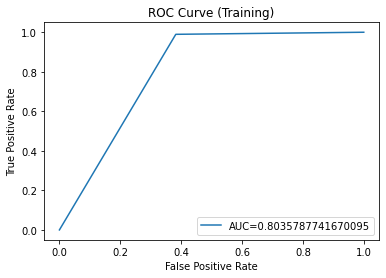

Test:
[[25 17]
 [ 0 71]]


<Figure size 432x288 with 0 Axes>

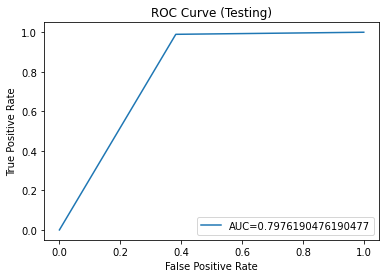


Run: 6
Train accuracy: 0.8596491228070176
Train precision: 0.8226744186046512
Train recall: 0.9895104895104895
Train F1 score: 0.8984126984126984
Train AUC: 0.8153434800493624
Test accuracy: 0.7964601769911505
Test precision: 0.7553191489361702
Test recall: 1.0
Test F1 score: 0.8606060606060607
Test AUC: 0.7261904761904762

Run: 7
Train accuracy: 0.8618421052631579
Train precision: 0.8213256484149856
Train recall: 0.9965034965034965
Train F1 score: 0.9004739336492891
Train AUC: 0.8158988070752776
Test accuracy: 0.8407079646017699
Test precision: 0.8045977011494253
Test recall: 0.9859154929577465
Test F1 score: 0.8860759493670887
Test AUC: 0.7905767940979208

Run: 8
Train accuracy: 0.8486842105263158
Train precision: 0.8108882521489972
Train recall: 0.9895104895104895
Train F1 score: 0.8913385826771654
Train AUC: 0.8006375976964213
Test accuracy: 0.8584070796460177
Test precision: 0.8160919540229885
Test recall: 1.0
Test F1 score: 0.8987341772151899
Test AUC: 0.8095238095238095

Run: 9

In [14]:
train_accuracy_spectral = []
train_precision_spectral = []
train_recall_spectral = []
train_f1_spectral = []
train_AUC_spectral = []

test_accuracy_spectral = []
test_precision_spectral = []
test_recall_spectral = []
test_f1_spectral = []
test_AUC_spectral = []

for M in range(30):
    print("Run:", M + 1)
    df_train = train_dfs[M]
    df_test = test_dfs[M]

    X_train = df_train.drop(['diagnosis'],axis=1).reset_index(drop=True)
    y_train = df_train[['diagnosis']]
    X_test = df_test.drop(['diagnosis'],axis=1).reset_index(drop=True)
    y_test = df_test[['diagnosis']]

    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

    sc = SpectralClustering(n_clusters=2,affinity='rbf',random_state=M)
    sc.fit(X_train_scaled)
    # print(sc.labels_)
    polls = []
    for cluster in range(2):
        cluster_indices = np.where(cluster == sc.labels_)[0]
        random_indices = []
        for i in range(30):
            random_indices.append(random.randint(0, len(cluster_indices)-1))
        random_points = cluster_indices[random_indices]

        count = list(y_train.values[random_points])
        polls.append(max(count, key=count.count))

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_scaled, sc.fit_predict(X_train_scaled)) 
        
    # train
    y_pred_train = []
    for p in sc.fit_predict(X_train_scaled):
        y_pred_train.append(polls[p])
    train_accuracy_spectral.append(accuracy_score(y_train, y_pred_train)) 
    print("Train accuracy:", accuracy_score(y_train, y_pred_train))
    train_precision_spectral.append(precision_score(y_train, y_pred_train))
    print("Train precision:", precision_score(y_train, y_pred_train))
    train_recall_spectral.append(recall_score(y_train, y_pred_train))
    print("Train recall:", recall_score(y_train, y_pred_train))
    train_f1_spectral.append(f1_score(y_train, y_pred_train))
    print("Train F1 score:", f1_score(y_train, y_pred_train))
    train_fpr, train_tpr, _ = roc_curve(y_train, y_pred_train)
    train_AUC_spectral.append(auc(train_fpr, train_tpr))
    print("Train AUC:", auc(train_fpr, train_tpr))


    # test
    y_pred_test = []
    for p in knn.predict(X_test_scaled):
        y_pred_test.append(polls[p])
    test_accuracy_spectral.append(accuracy_score(y_test, y_pred_test)) 
    print("Test accuracy:", accuracy_score(y_test, y_pred_test))
    test_precision_spectral.append(precision_score(y_test, y_pred_test))
    print("Test precision:", precision_score(y_test, y_pred_test))
    test_recall_spectral.append(recall_score(y_test, y_pred_test))
    print("Test recall:", recall_score(y_test, y_pred_test))
    test_f1_spectral.append(f1_score(y_test, y_pred_test))
    print("Test F1 score:", f1_score(y_test, y_pred_test))
    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_test)
    test_AUC_spectral.append(auc(test_fpr, test_tpr))
    print("Test AUC:", auc(test_fpr, test_tpr))
    
    if (M + 1) == 5:
        print("For run number 5:")
        print("Train:")
        print(confusion_matrix(y_train, y_pred_train))
        #create ROC curve
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(train_fpr, train_tpr)))
        plt.title('ROC Curve (Training)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
        
        print("Test:")
        print(confusion_matrix(y_test, y_pred_test))
        plt.figure()
        plt.figure()
        plt.plot(train_fpr, train_tpr, label="AUC="+str(auc(test_fpr, test_tpr)))
        plt.title('ROC Curve (Testing)')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
    print()

In [15]:
print("Train:")
print("Avg accuracy iuscore:", statistics.mean(train_accuracy_spectral))
print("Avg precision score:", statistics.mean(train_precision_spectral))
print("Avg recall score:", statistics.mean(train_recall_spectral))
print("Avg F1 score:", statistics.mean(train_f1_spectral))
print("Avg AUC score:", statistics.mean(train_AUC_spectral))
print()
print("Test:")
print("Avg accuracy score:", statistics.mean(test_accuracy_spectral))
print("Avg precision score:", statistics.mean(test_precision_spectral))
print("Avg recall score:", statistics.mean(test_recall_spectral))
print("Avg f1 score:", statistics.mean(test_f1_spectral))
print("Avg AUC score:", statistics.mean(test_AUC_spectral))

Train:
Avg accuracy iuscore: 0.8616228070175439
Avg precision score: 0.8235393667642008
Avg recall score: 0.9926573426573426
Avg F1 score: 0.900112339076943
Avg AUC score: 0.8169169066227889

Test:
Avg accuracy score: 0.859882005899705
Avg precision score: 0.820831932522108
Avg recall score: 0.9967136150234742
Avg f1 score: 0.899841085732773
Avg AUC score: 0.8126425217974513


<h3>v. One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.</h3>

In [28]:
df_results = pd.DataFrame({'Avg. Test Accuracy': [statistics.mean(test_accuracy_supervised), statistics.mean(test_accuracy_semi_supervised), statistics.mean(test_accuracy_unsupervised), statistics.mean(test_accuracy_spectral)],
                   'Avg. Test Precision': [statistics.mean(test_precision_supervised), statistics.mean(test_precision_semi_supervised), statistics.mean(test_precision_unsupervised), statistics.mean(test_precision_spectral)],
                   'Avg. Recall': [statistics.mean(test_recall_supervised), statistics.mean(test_recall_semi_supervised), statistics.mean(test_recall_unsupervised), statistics.mean(test_recall_spectral)],
                   'Avg. F1-Score': [statistics.mean(test_f1_supervised), statistics.mean(test_f1_semi_supervised), statistics.mean(test_f1_unsupervised), statistics.mean(test_f1_spectral)],
                   'Avg. AUC': [statistics.mean(test_AUC_supervised), statistics.mean(test_AUC_semi_supervised), statistics.mean(test_AUC_unsupervised), statistics.mean(test_AUC_spectral)]},
                  index=['Supervised', 'Semi-Supervised', 'Unsupervised', 'Spectral Clustering'])
df_results

,Avg. Test Accuracy,Avg. Test Precision,Avg. Recall,Avg. F1-Score,Avg. AUC
Supervised,0.971681,0.971612,0.984038,0.977631,0.967416
Semi-Supervised,0.962832,0.989070,0.951643,0.969138,0.966695
Unsupervised,0.923894,0.915036,0.969953,0.941429,0.907992
Spectral Clustering,0.859882,0.820832,0.996714,0.899841,0.812643
